<a href="https://colab.research.google.com/github/ajiggody/CiFAR-10-Image-Classification-using-CNN/blob/main/CiFAR_10_Images_Classification_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Definition

- CIFAR - 10 is a dataset that consists of several images divided into the following 10 classes:

  - Airplanes
  - Cars
  - Birds
  - Cats
  - Deer
  - Dog
  - Frog
  - Horses
  - Ships
  - Trucks
   - The dataset stands for the Canadian Institute For Advanced Research (CIFAR)
   - CIFAR-10 is widely used for Machine Learning and computer vision applications
   - The data consists of 60,000 32x32 color images and over 6,000 image   s of each class.
   - Images have low resolution (32x32).
   - Data Source: https://www.cs.toronto.edu/~kriz/cifar.html

In [ ]:
!git clone https://github.com/ajiggody/your_repository.git

Cloning into 'your_repository'...
fatal: could not read Username for 'https://github.com': No such device or address


In [ ]:
# Import libraries/datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_test.shape

(10000, 1)

# Visualize the data

[0]


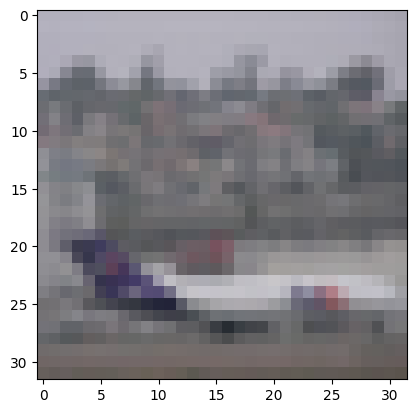

In [ ]:
i = 30000
plt.imshow(X_train[i])
print(y_train[i]);

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


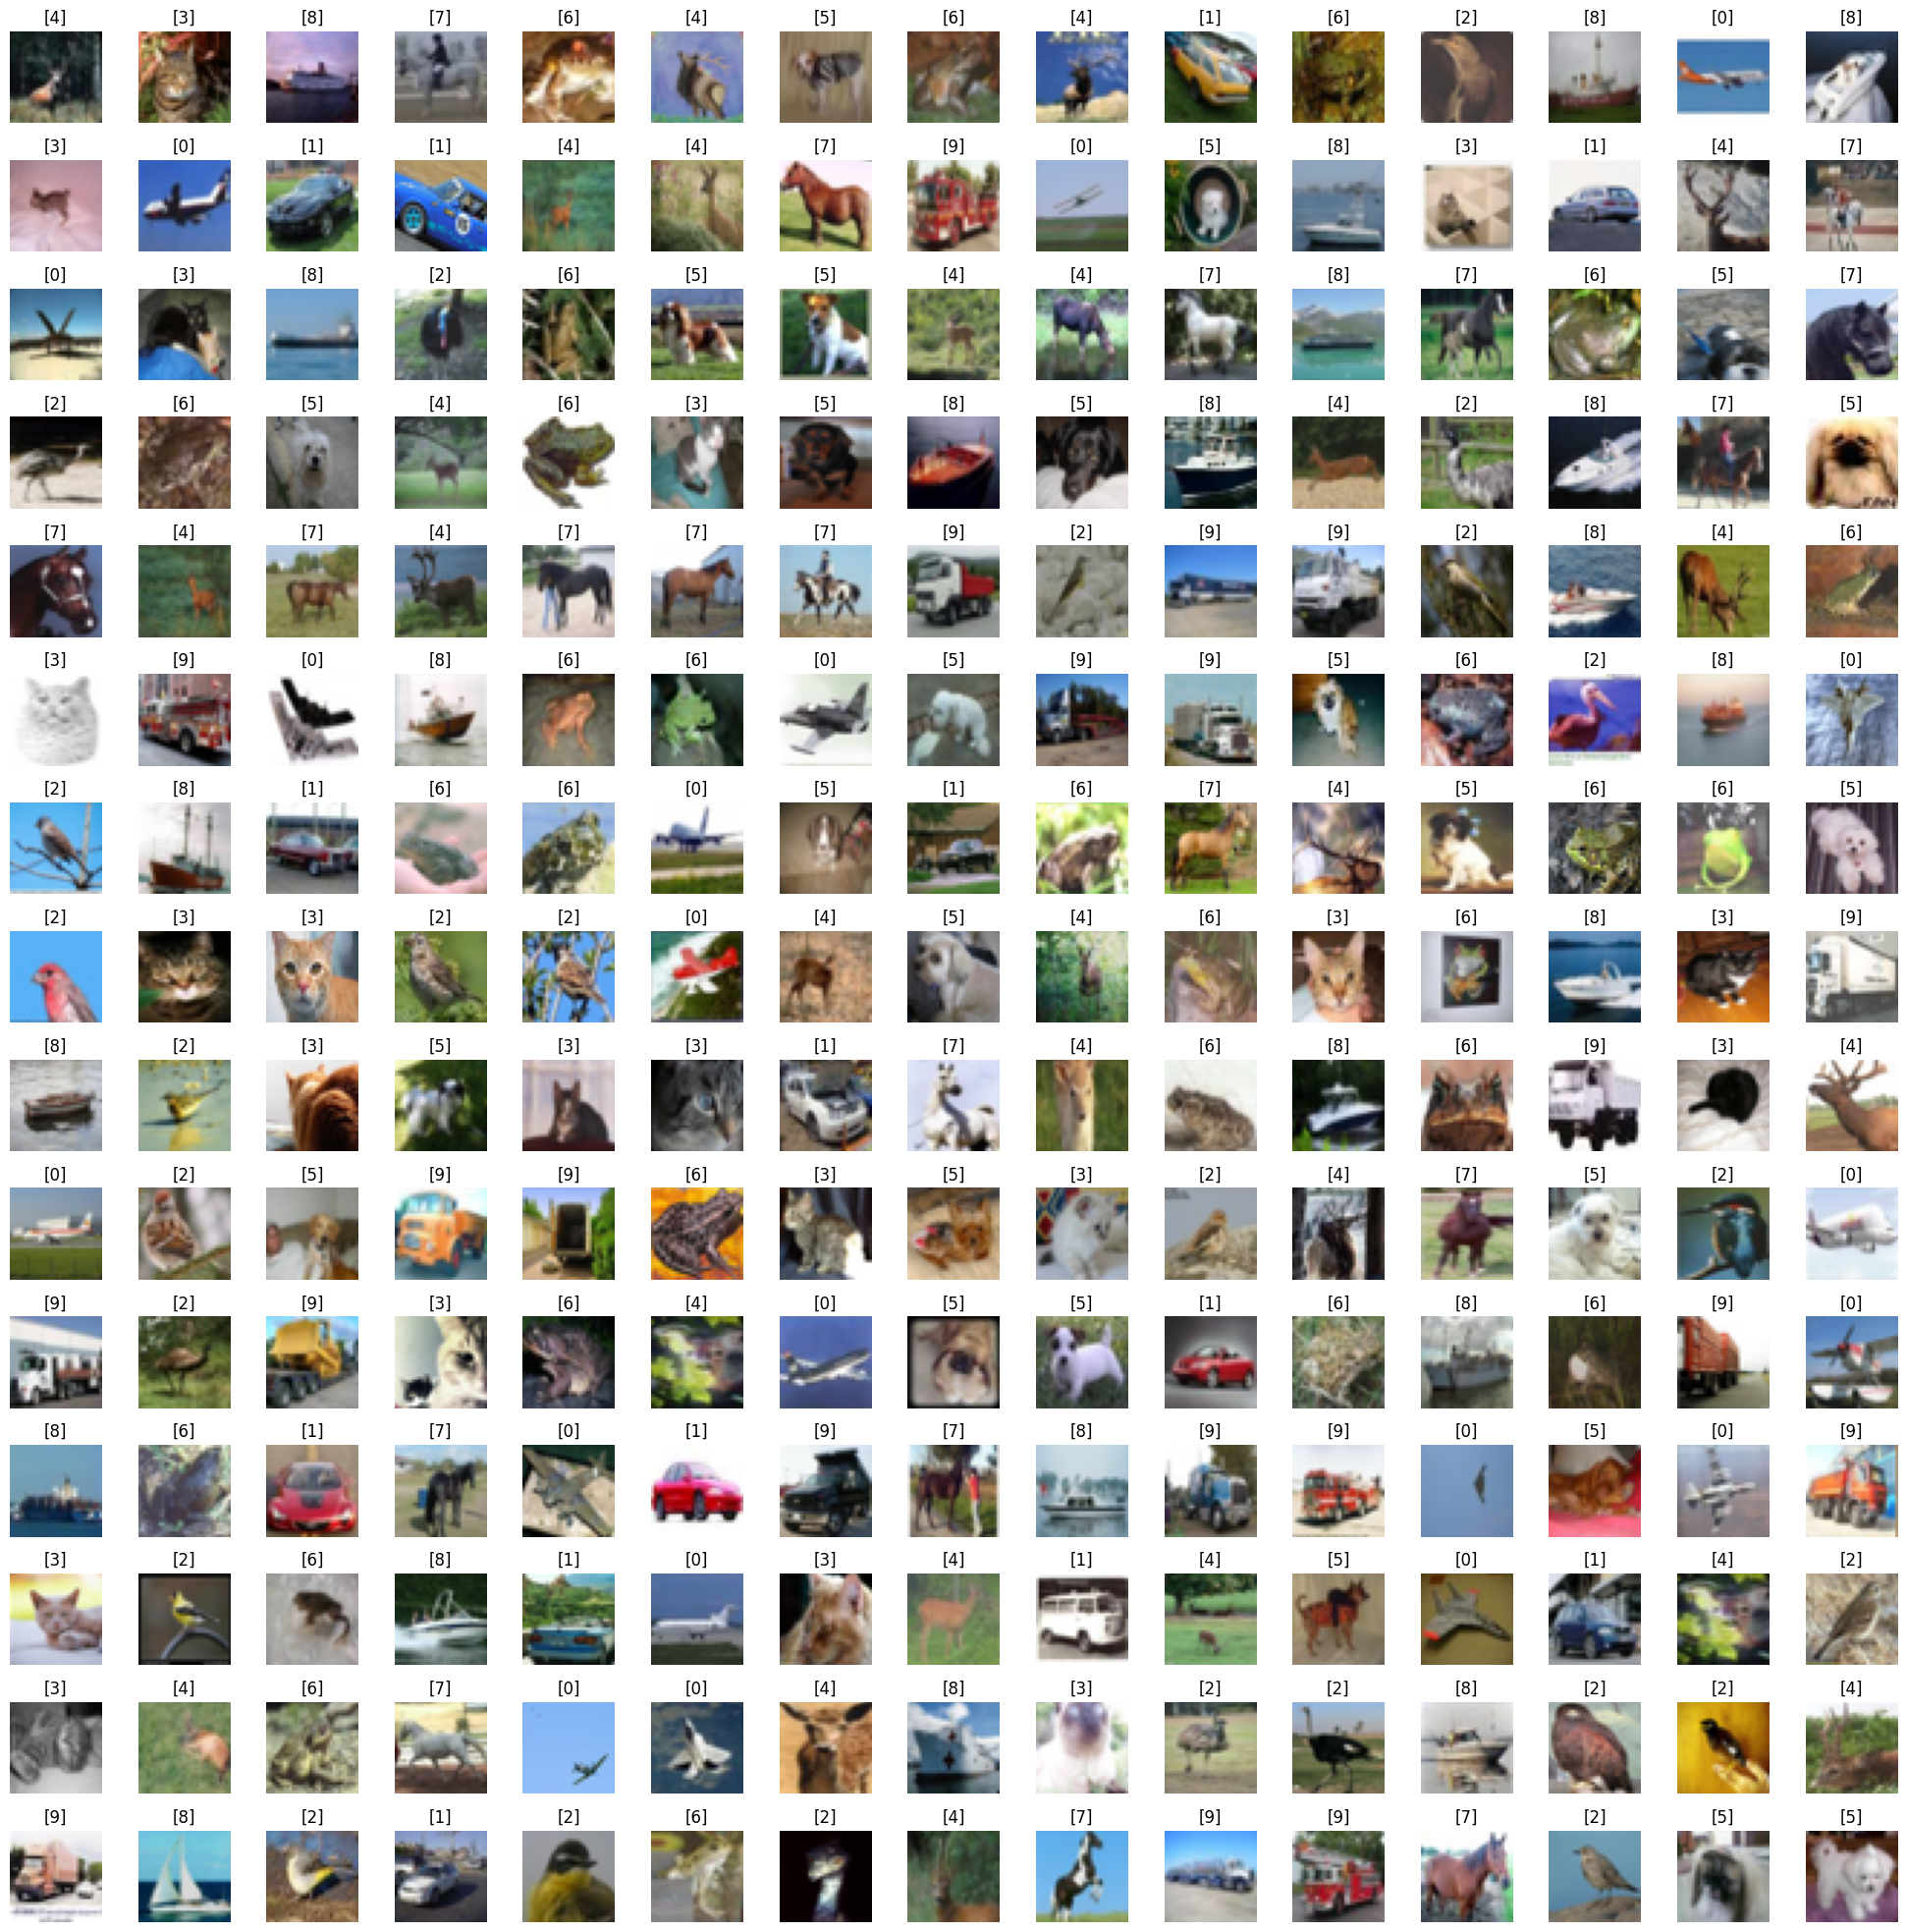

In [ ]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25))
axes = axes.ravel() #flattens the 15x15 matrix in to 15x15 arrays

n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
  index = np.random.randint(0, n_training) #picks a random number in the dataset
  axes[i].imshow (X_train[index]) #plots image to show from the training dataset
  axes[i].set_title(y_train[index]) # sets the label above the actual image
  axes[i].axis('off') #takes off the X&Y axes
plt.subplots_adjust(hspace=0.4); # increases the spacing of the images

In [ ]:
n_training

50000

# Data Preparation

In [ ]:
# Converted the data into float format
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
number_cat = 10

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
# Changed integer values into categorical values
import keras
y_train = keras.utils.to_categorical(y_train, number_cat)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_test = keras.utils.to_categorical(y_test, number_cat)

In [ ]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [ ]:
# Extract the size of the input imagesI
Input_shape = X_train.shape[1:]
Input_shape

(32, 32, 3)

# Train the model

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [ ]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape = Input_shape))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 1024, activation = 'relu')) # this is how to create an artifical neural network // how you create a hidden layer

cnn_model.add(Dense(units = 1024, activation = 'relu'))

cnn_model.add(Dense(units = 10, activation = 'softmax'))

In [ ]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.RMSprop(lr = 0.001), metrics = ['accuracy'])

In [ ]:
history = cnn_model.fit(X_train, y_train, batch_size = 32, epochs = 2, shuffle = True )

Epoch 1/2
1563/1563 [==============================] - 26s 9ms/step - loss: 1.6355 - accuracy: 0.4033
Epoch 2/2
1563/1563 [==============================] - 13s 8ms/step - loss: 1.1750 - accuracy: 0.5892


# Evaluate the model

In [ ]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 2s 4ms/step - loss: 1.2224 - accuracy: 0.5973
Test Accuracy: 0.5972999930381775


In [ ]:
# Make predictions for all samples in X_test
predicted_probabilities = cnn_model.predict(X_test)

# Get the class labels with the highest probability for each sample
predicted_classes = np.argmax(predicted_probabilities, axis=-1)

# Now, 'predicted_classes' contains the predicted class labels for each sample
print(predicted_classes)

313/313 [==============================] - 1s 3ms/step
[3 8 8 ... 2 4 7]


In [ ]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [ ]:
y_test = y_test.argmax(1)

In [ ]:
y_test

array([3, 8, 8, ..., 5, 1, 7])

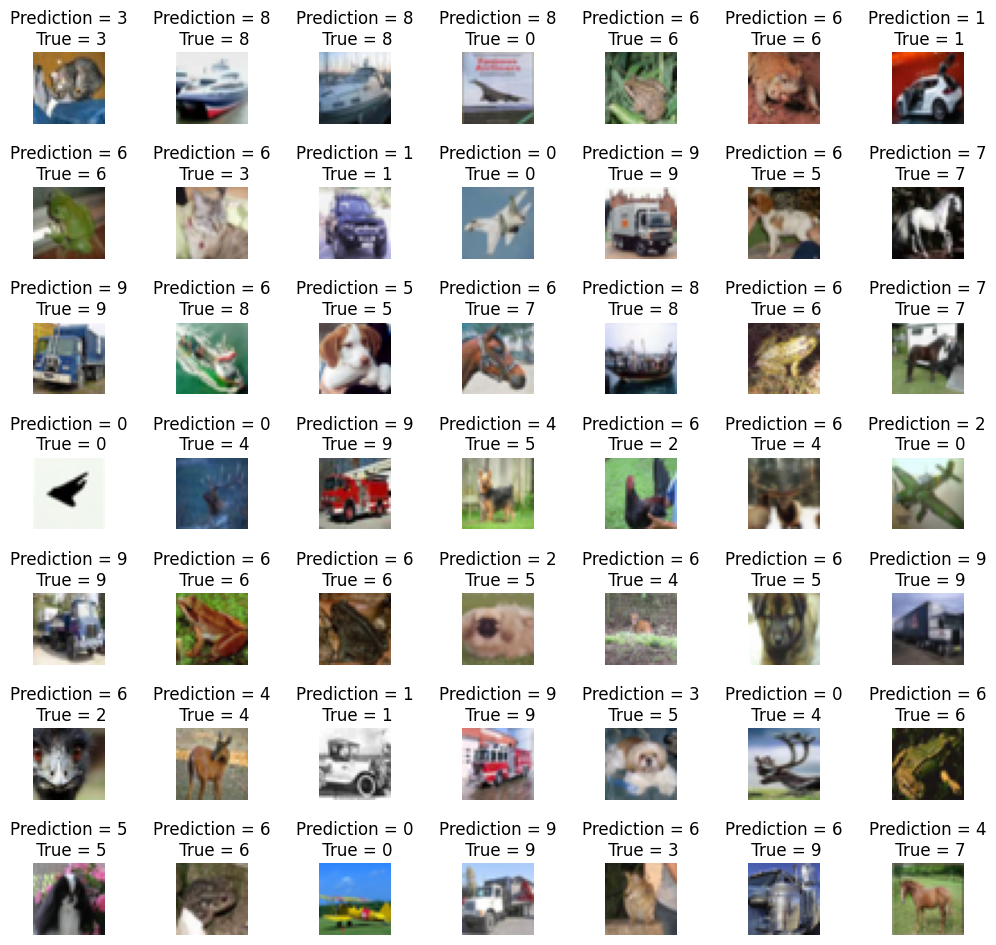

In [ ]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
  axes[i].imshow(X_test[i])
  axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_test[i]))
  axes[i].axis('Off')

  plt.subplots_adjust(wspace=1)

<Axes: >

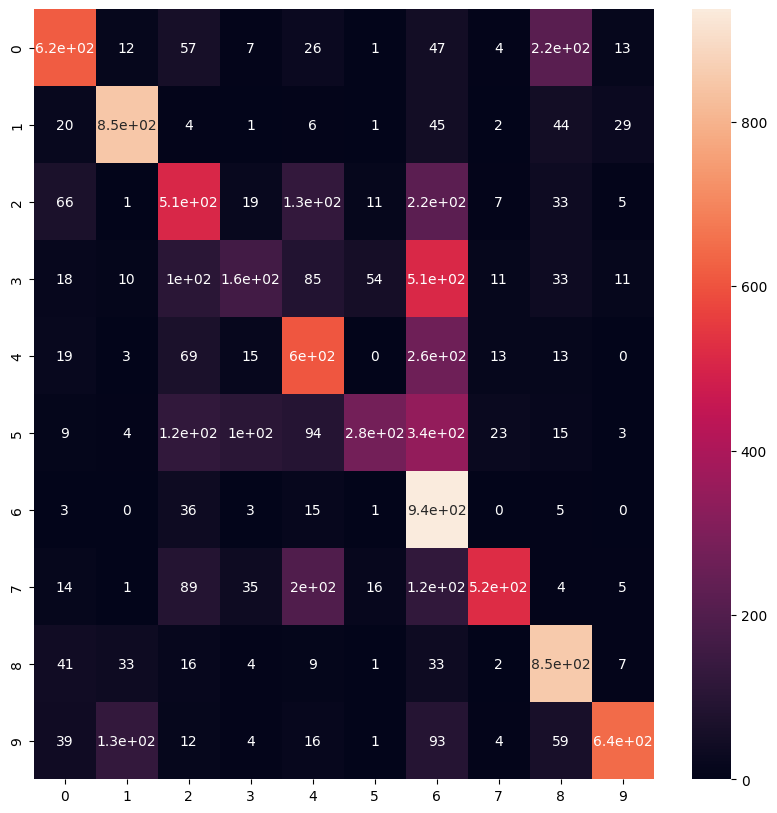

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test,predicted_classes)
cm
plt.figure(figsize= (10, 10))
sns.heatmap(cm, annot = True)

# Save the model

In [ ]:
import os
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
  os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model.h5')
cnn_model.save(model_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Data Augmentation for CIFAR-10 Dataset

In [ ]:
import keras
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
n = 8
X_train_sample = X_train[:n]
X_train_sample.shape

(8, 32, 32, 3)

In [ ]:
# Create image data generator
from keras.preprocessing.image import ImageDataGenerator
datagen_train = ImageDataGenerator(rotation_range = 90)
datagen_train.fit(X_train_sample)

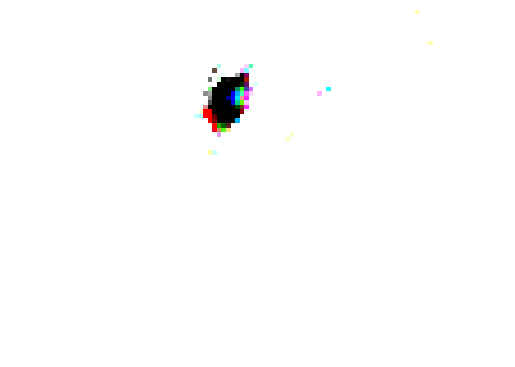

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()


datagen = keras.preprocessing.image.ImageDataGenerator(rotation_range=90,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

datagen.fit(x_train)

for X_batch, y_batch in datagen.flow(x_train,y_train, batch_size=6):
    for i in range(0, 6):
        plt.subplot(2,3,i+1)
        plt.imshow(X_batch[i])
        plt.axis('off')
    break

In [ ]:
datagen = ImageDataGenerator(
                            rotation_range = 90,
                            width_shift_range = 0.1,
                            horizontal_flip = True,
                            vertical_flip = True)

In [ ]:
datagen.fit(X_train)

In [ ]:
cnn_model.fit_generator(datagen.flow(X_train,y_train))

<ipython-input-41-637273a6727c>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cnn_model.fit_generator(datagen.flow(X_train,y_train))


1563/1563 [==============================] - 43s 27ms/step - loss: 7425315383185244160.0000 - accuracy: 6.4000e-04
